In [1]:
from functools import partial
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")

# Data Import

We choose to use an external dataset to demonstrate how R's own data import
features can be used.

In [2]:
from rpy2.robjects.packages import importr
utils = importr('utils')

dataf = utils.read_csv('../dat/california_cities.csv')

The objects returned by R's own `read.csv()` function (note that the R function
in the R package `utils` is called `read.csv()` while the Python function is called
`read_csv()` - `rpy2` converts R symbols with dots to underscores for Python).

`rpy2` provides customization to display R objects such as data frames in HTML
in a notebook. That customization is enabled as follows:

In [3]:
import rpy2.ipython.html
rpy2.ipython.html.init_printing()

In [4]:
dataf

,,X,city,latd,longd,...,area_water_km2,area_water_percent
0,1,0,Adelanto,34.57611111111112,-117.43277777777779,...,0.046,0.03
1,2,1,AgouraHills,34.15333333333333,-118.76166666666667,...,0.076,0.37
2,3,2,Alameda,37.75611111111111,-122.27444444444444,...,31.983,53.79
3,4,3,Albany,37.886944444444445,-122.29777777777778,...,9.524,67.28
4,5,4,Alhambra,34.081944444444446,-118.135,...,0.003,0.01
5,6,5,AlisoViejo,33.575,-117.72555555555556,...,0.0,0.0
6,7,6,Alturas,41.48722222222222,-120.5425,...,0.036000000000000004,0.57
7,8,7,AmadorCity,38.419444444444444,-120.82416666666666,...,0.0,0.0
...,...,...,...,...,...,...,...,...
480,481,480,Yucaipa,34.030277777777776,-117.04861111111111,...,0.013000000000000001,0.02


In [5]:
dataf.colnames

X,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,...,area_water_km2,area_water_percent


In [6]:
stats = importr('stats')
base = importr('base')
stats.lm('elevation_m ~ latd + longd', data=dataf)

0,coefficients,(Intercep...
1,residuals,...
2,effects,...
3,rank,[1] 3
4,fitted.values,...
5,assign,[1] 0 1 2
6,qr,$qr ...
7,df.residual,[1] 431
...,...,...
11,terms,elevation...
12,model,...


# Graphics

R has arguably some the best static visualizations, often looking more polished
than other visualization systems and this without the need to spend much
effort on them.

## Using `ggplot2`

Among R visulization pacakges, `ggplot2` has emerged as something Python users
wished so much they had that various projects to try port it to Python
are regularly started.

However, the best way to have `ggplot2` might be to use `ggplot2` from Python.

In [7]:
import rpy2.robjects.lib.ggplot2 as gp

Calling `ggplot2` looks pretty much like it would in R, which allows one to use the
all available documentation and examples available for the R package. Remember that
this is not a reimplementation of ggplot2 with inevitable differences and delay
for having the latest changes: the R package itself is generating the figures.

In [8]:
p = (gp.ggplot(dataf) +
     gp.aes_string(x='longd',
                   y='latd',
                   color='population_total',
                   size='area_total_km2') +
     gp.geom_point() +
     gp.scale_color_continuous(trans='log10'))

Plotting the resulting R/ggplot2 object into the output cell of a notebook, is just
function call away.

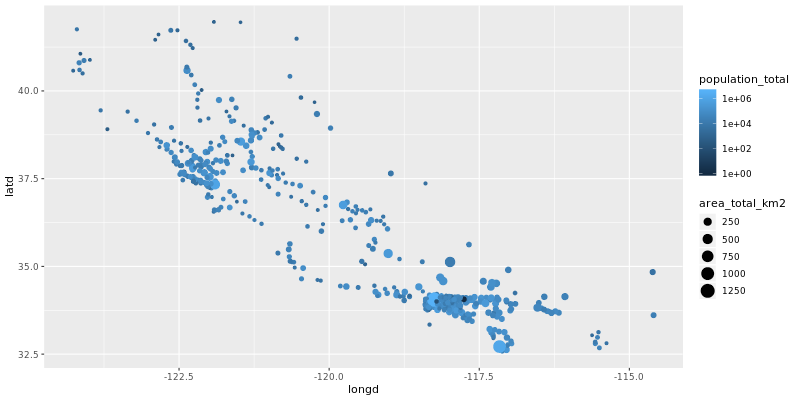

In [9]:
from rpy2.ipython.ggplot import image_png
image_png(p)

All features from `ggplot2` should be present. A more complex example to
get the figure we want is:

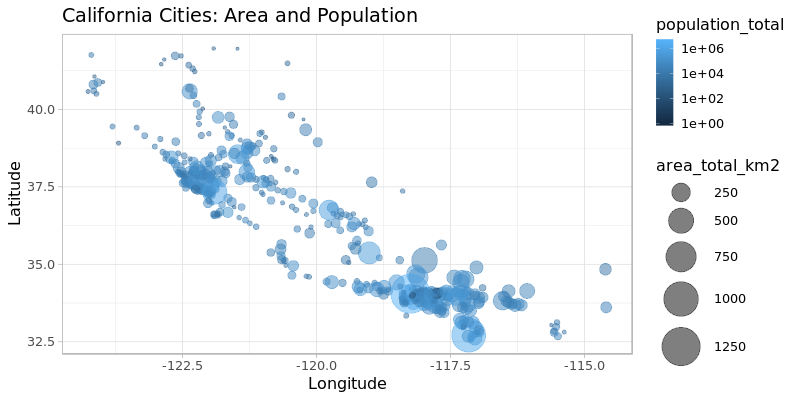

In [10]:
from rpy2.robjects.vectors import IntVector
p = (gp.ggplot(dataf) +
     gp.aes_string(x='longd',
                   y='latd',
                   color='population_total',
                   size='area_total_km2') +
     gp.geom_point(alpha=0.5) +
     # Axis definitions.
     gp.scale_x_continuous('Longitude') +
     gp.scale_y_continuous('Latitude') +
     # Custom size range.
     gp.scale_size(range=IntVector([1, 18])) +
     # Transform for pop -> color mapping
     gp.scale_color_continuous(trans='log10') +
     # Title.
     gp.ggtitle('California Cities: Area and Population') +
     # Plot theme and text size.
     gp.theme_light(base_size=16))
image_png(p)

## Using `ggplot2` extensions

There existing additional R packages extending `ggplot2`, and while it would be impossible
for the rpy2 to provide wrapper for all of them the wrapper for `ggplot2` is based
on class hierarchies that should make the use of such extensions really easy.

For example, to use the viridis color scale, we just need to import the corresponding R package,
and write 3 lines of Python to extend `rpy2`'s ggplot2 wrapper with a new color scale. A clas
diagram with the classes in the rpy2 wrapper for ggplot2 is available in the rpy2 documentation.

In [11]:
%load_ext rpy2.ipython

In [12]:
%%R
install.packages("viridis")
library(viridis)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘gridExtra’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/gridExtra_2.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1062844 bytes (1.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [13]:
viridis = importr('viridis')
class ScaleColorViridis(gp.ScaleColour):
    _constructor = viridis.scale_color_viridis
scale_color_viridis = ScaleColorViridis.new

That new color scale can then be used as any other scale already present in `ggplot2`:

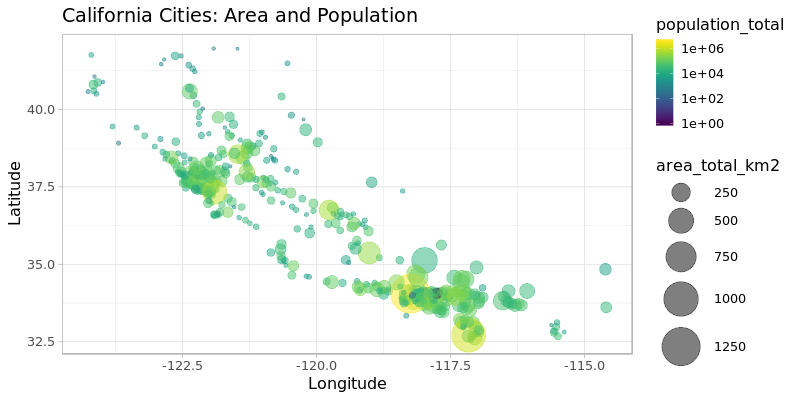

In [14]:
p = (gp.ggplot(dataf) +
     gp.aes_string(x='longd',
                   y='latd',
                   color='population_total',
                   size='area_total_km2') +
     gp.geom_point(alpha=0.5) +
     gp.scale_x_continuous('Longitude') +
     gp.scale_y_continuous('Latitude') +
     gp.scale_size(range=IntVector([1, 18])) +
     scale_color_viridis(trans='log10') +
     gp.ggtitle('California Cities: Area and Population') +
     gp.theme_light(base_size=16))
image_png(p)

So far we have shown that using `ggplot2` can be done from Python as if it
was just an other Python library for visualization, but R can also be used
in cells.

First the so-called "R magic" extension should be loaded.

In [15]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


From now on, code cells starting with `%%R` will see their content evaluated as R code.
If the R code is generating figures, they will be displayed along with the rest of the output.

In [16]:
%%R
R.version.string

[1] "R version 3.5.2 (2018-12-20)"


In [17]:
%%R -i dataf

require(dplyr)
glimpse(dataf)

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Observations: 482
Variables: 14
$ X                  <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …
$ city               <fct> Adelanto, AgouraHills, Alameda, Albany, Alhambra, …
$ latd               <dbl> 34.57611, 34.15333, 37.75611, 37.88694, 34.08194, …
$ longd              <dbl> -117.4328, -118.7617, -122.2744, -122.2978, -118.1…
$ elevation_m        <dbl> 875, 281, NA, NA, 150, 127, 1332, 280, 14, 48, 132…
$ elevation_ft       <dbl> 2871, 922, 33, 43, 492, 417, 4370, 919, 46, 157, 4…
$ population_total   <int> 31765, 20330, 75467, 18969, 83089, 47823, 2827, 18…
$ area_total_sq_mi   <dbl> 56.027, 7.822, 22.960, 5.465, 7.632, 7.472, 2.449,…
$ area_land_sq_mi    <dbl> 56.009, 7.793, 10.611, 1.788, 7.631, 7.472, 2.435,…
$ area_water_sq_mi   <dbl> 0.018, 0.029, 12.349, 3.677, 0.001, 0.000, 0.014, …
$ area_total_km2     <dbl> 145.107, 20.260, 59.465, 14.155, 19.766, 19.352, 6…
$ area_land_km2      <dbl> 145.062, 20.184, 27.482, 4.632, 19.763, 19.352, 6.…
$ area_water_km2    

The data frame called `dataf` in our Python notebook was already bound to the name
`dataf` in the R main namespace (`GlobalEnv` in the R lingo) in our previous cell.
We can just use it in subsequent cells.

Running an R code cell.


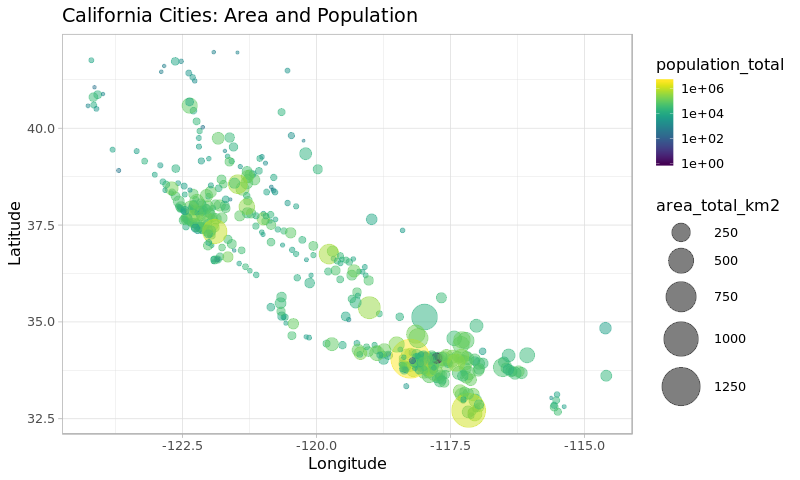

In [18]:
%%R -w 800 --type=cairo

cat("Running an R code cell.\n")

p <- ggplot(dataf) +
     aes_string(x = 'longd',
                y = 'latd',
                color = 'population_total',
                size = 'area_total_km2') +
     geom_point(alpha = 0.5) +
     scale_x_continuous('Longitude') +
     scale_y_continuous('Latitude') +
     scale_size(range = c(1, 18)) +
     scale_color_viridis(trans='log10') +
     ggtitle('California Cities: Area and Population') +
     theme_light(base_size=16)
print(p)